In [28]:
import pandas as pd

preprocessed_accidents_df = pd.read_csv('dataset/pre-processed_dataset_no_state.csv')


In [29]:
preprocessed_accidents_df.drop('Unnamed: 0',axis=1,inplace=True)

In [30]:

preprocessed_accidents_df['Severity'].info

<bound method Series.info of 0         1.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
606663    0.0
606664    0.0
606665    0.0
606666    0.0
606667    0.0
Name: Severity, Length: 606668, dtype: float64>

In [31]:
print(preprocessed_accidents_df.columns)

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Side', 'Temperature', 'Wind_Chill', 'Humidity',
       ...
       'Thunder / Windy', 'Thunder and Hail / Windy',
       'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms and Rain',
       'Tornado', 'Volcanic Ash', 'Widespread Dust', 'Wintry Mix',
       'Wintry Mix / Windy'],
      dtype='object', length=125)


Cross-Validation here is carried out, giving the still high number of records, Oversampling (through SMOTE) is used in combination with Undersampling (through RandomUnderSampler) to get the best result possible

In [32]:
from numpy import mean
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from imblearn.over_sampling._smote.base import SMOTE, Counter
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as plt

def execute_classifier(classifier):

    y = preprocessed_accidents_df['Severity']
    X = preprocessed_accidents_df.drop('Severity',axis=1)

    oversampler = SMOTE()
    X,y = oversampler.fit_resample(X,y)

    sampler = RandomUnderSampler(sampling_strategy = {0:50000,1:50000},random_state=42)
    X, y = sampler.fit_resample(X, y)

    pipeline_estimators = [('scaling',StandardScaler()),('clf',classifier)]
    pipe = Pipeline(pipeline_estimators)
    skf = StratifiedKFold(10, shuffle = True, random_state = 21)

    results_validation = cross_validate(pipe, 
                        X,
                        y,
                        scoring = {'fscore': make_scorer(f1_score),
                                   'accuracy': make_scorer(accuracy_score)},
                        error_score= 'raise',
                        return_estimator = True,
                        cv = skf,
                        n_jobs = -1) 
    
    metrics = results_validation['test_fscore']

    #print(results_validation)
    print("Mean fscore: ",mean(metrics))


    pipeline_estimators_fsel = [('scaling',StandardScaler()),('feature-selection',SelectKBest(k=3)),('clf',classifier)]
    pipe_fsel = Pipeline(pipeline_estimators_fsel)
    skf_fsel = StratifiedKFold(10, shuffle = True, random_state = 21)

    results_validation_fsel = cross_validate(pipe_fsel, 
                        X,
                        y,
                        scoring = {'fscore': make_scorer(f1_score),
                                   'accuracy': make_scorer(accuracy_score)},
                        error_score= 'raise',
                        return_estimator = True,
                        cv = skf_fsel,
                        n_jobs = -1) 
    
    metrics_fsel = results_validation_fsel['test_fscore']

    #print(results_validation_fsel)
    print("Mean fscore fsel: ",mean(metrics_fsel))

    confront_metrics = pd.DataFrame({'fsel':results_validation_fsel['test_fscore'],
                        'nofsel': results_validation['test_fscore']})
    ax = confront_metrics.boxplot(figsize = (3,3))
    ax.set_ylabel('f-score')
    plt.show()

Mean fscore:  0.7989577571771374
Mean fscore fsel:  0.6530840815455095


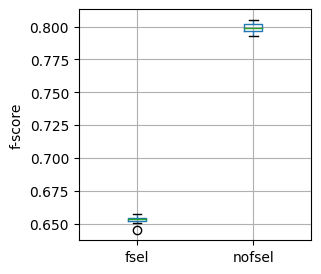

In [33]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(criterion='gini')
execute_classifier(decisionTree)

In [34]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(criterion='entropy')
execute_classifier(decisionTree)

Mean fscore:  0.8583280936570548
Mean fscore fsel:  0.6850462763764968


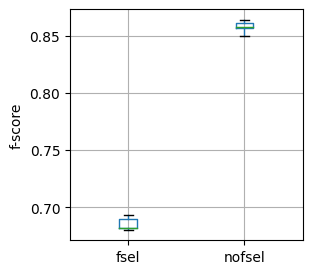

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(criterion='gini')
execute_classifier(randomForest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(criterion='entropy')
execute_classifier(randomForest)

{'fit_time': array([77.27689648, 76.90131283, 80.31797886, 78.63961816, 79.10715222,
       78.29625344, 79.06547213, 79.18587875, 79.14623237, 80.10389757]), 'score_time': array([0.78256583, 0.77650285, 0.81225324, 0.83304715, 0.82048702,
       0.82347775, 0.83852577, 0.7825675 , 0.67481065, 0.37783074]), 'estimator': [Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', RandomForestClassifier(criterion='entropy'))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', RandomForestClassifier(criterion='entropy'))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', RandomForestClassifier(criterion='entropy'))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', RandomForestClassifier(criterion='entropy'))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', RandomForestClassifier(criterion='entropy'))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', RandomFores

Mean fscore:  0.800243972298162
Mean fscore fsel:  0.6155924766379408


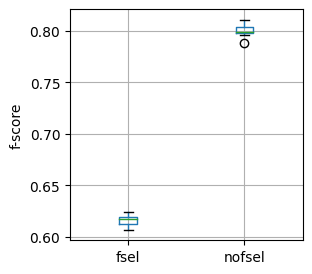

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()
execute_classifier(logisticRegression)

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression(class_weight='balanced')
execute_classifier(logisticRegression)

{'fit_time': array([2.80374956, 2.37329221, 2.21502924, 2.7838738 , 2.8101151 ,
       2.55418587, 2.4724133 , 2.13726449, 1.69981885, 1.31630135]), 'score_time': array([0.04937673, 0.03964496, 0.05103087, 0.05101013, 0.07221508,
       0.04183507, 0.03309178, 0.02829528, 0.02315378, 0.01909208]), 'estimator': [Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', LogisticRegression(class_weight='balanced'))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', LogisticRegression(class_weight='balanced'))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', LogisticRegression(class_weight='balanced'))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', LogisticRegression(class_weight='balanced'))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', LogisticRegression(class_weight='balanced'))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', LogisticRegression(cl

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(10) 
execute_classifier(knn)


{'fit_time': array([1.44004726, 1.4393518 , 1.44684863, 1.42453194, 1.24318171,
       1.25592804, 1.38799024, 1.4298141 , 1.33961391, 1.2742672 ]), 'score_time': array([37.88413429, 38.14241147, 37.9719615 , 38.12571502, 37.63918424,
       38.02799606, 36.88108063, 36.1492393 , 35.18088245, 33.53405046]), 'estimator': [Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=10))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=10))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=10))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=10))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=10))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=10))]), Pipel

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(9) 
execute_classifier(knn)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(8) 
execute_classifier(knn)


{'fit_time': array([0.69755697, 0.81140757, 0.86915827, 0.93648815, 1.06626177,
       0.88075542, 0.86057663, 0.88437939, 0.87662196, 1.04228115]), 'score_time': array([32.36518049, 32.49140549, 33.04754257, 32.58686662, 32.3996799 ,
       31.92925429, 31.47189999, 31.00158548, 30.33401513, 29.32037973]), 'estimator': [Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=8))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=8))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=8))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=8))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=8))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=8))]), Pipeline(st

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(7) 
execute_classifier(knn)


{'fit_time': array([0.86475921, 0.81589913, 0.45011497, 0.59678888, 0.77466273,
       0.83440828, 0.78964686, 0.8292048 , 0.8568933 , 0.82737732]), 'score_time': array([31.06462026, 30.74762559, 29.99184036, 30.41615081, 30.73710608,
       31.0694437 , 30.53415561, 30.14477587, 29.56055117, 28.88044405]), 'estimator': [Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=7))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=7))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=7))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=7))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=7))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=7))]), Pipeline(st

In [ ]:
knn = KNeighborsClassifier(6) 
execute_classifier(knn)


{'fit_time': array([0.44604921, 0.56850863, 0.69149923, 0.71434593, 0.77572703,
       0.87805748, 0.96153951, 0.81762171, 0.79857326, 0.83843875]), 'score_time': array([29.92671466, 30.93100214, 31.05406451, 31.49019194, 31.32786298,
       31.58530045, 30.92287374, 30.44187069, 29.83245349, 29.25805545]), 'estimator': [Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=6))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=6))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=6))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=6))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=6))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=6))]), Pipeline(st

Mean fscore:  0.8203170350532547
Mean fscore fsel:  0.6838162426768042


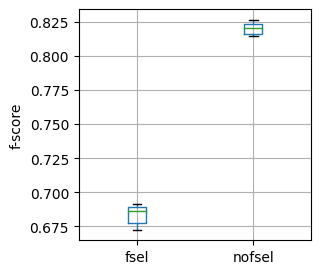

In [ ]:
knn = KNeighborsClassifier(5) 
execute_classifier(knn)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
execute_classifier(adaboost)

{'fit_time': array([25.10712123, 25.23453355, 25.13371944, 25.18273616, 24.972363  ,
       24.93336821, 24.88434076, 24.54948354, 24.21967387, 23.76347709]), 'score_time': array([0.42606544, 0.38768792, 0.38451552, 0.3361783 , 0.32265306,
       0.26573062, 0.21095705, 0.20046234, 0.16588664, 0.13799357]), 'estimator': [Pipeline(steps=[('scaling', StandardScaler()), ('clf', AdaBoostClassifier())]), Pipeline(steps=[('scaling', StandardScaler()), ('clf', AdaBoostClassifier())]), Pipeline(steps=[('scaling', StandardScaler()), ('clf', AdaBoostClassifier())]), Pipeline(steps=[('scaling', StandardScaler()), ('clf', AdaBoostClassifier())]), Pipeline(steps=[('scaling', StandardScaler()), ('clf', AdaBoostClassifier())]), Pipeline(steps=[('scaling', StandardScaler()), ('clf', AdaBoostClassifier())]), Pipeline(steps=[('scaling', StandardScaler()), ('clf', AdaBoostClassifier())]), Pipeline(steps=[('scaling', StandardScaler()), ('clf', AdaBoostClassifier())]), Pipeline(steps=[('scaling', StandardS

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=60)
execute_classifier(adaboost)

{'fit_time': array([28.73402929, 28.63506293, 28.31976318, 28.32614183, 28.41493273,
       28.62454176, 28.74262309, 28.59882641, 28.34880996, 28.11689687]), 'score_time': array([0.34850121, 0.31451368, 0.54296756, 0.53009343, 0.4829576 ,
       0.40783572, 0.32434726, 0.28897572, 0.26162148, 0.1915462 ]), 'estimator': [Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', AdaBoostClassifier(n_estimators=60))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', AdaBoostClassifier(n_estimators=60))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', AdaBoostClassifier(n_estimators=60))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', AdaBoostClassifier(n_estimators=60))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', AdaBoostClassifier(n_estimators=60))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', AdaBoostClassifier(n_estimators=60))]), Pipeline(st

Mean fscore:  0.8238593200146053
Mean fscore fsel:  0.6969966098345753


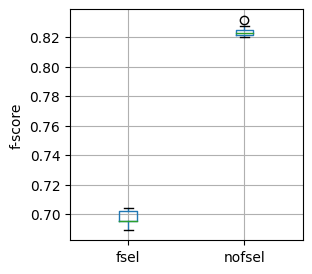

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=70)
execute_classifier(adaboost)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators=80)
execute_classifier(adaboost)

{'fit_time': array([45.43566298, 44.23251939, 44.90660071, 44.22367477, 44.03277612,
       45.44149446, 44.70756507, 45.04521823, 42.54951334, 44.33652043]), 'score_time': array([0.48541021, 0.59333587, 0.86256504, 0.7047267 , 0.76368594,
       0.5443542 , 0.56468987, 0.34510803, 0.70707798, 0.31057405]), 'estimator': [Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', AdaBoostClassifier(n_estimators=80))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', AdaBoostClassifier(n_estimators=80))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', AdaBoostClassifier(n_estimators=80))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', AdaBoostClassifier(n_estimators=80))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', AdaBoostClassifier(n_estimators=80))]), Pipeline(steps=[('scaling', StandardScaler()),
                ('clf', AdaBoostClassifier(n_estimators=80))]), Pipeline(st